**IMPORTING NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import StackingClassifier
import warnings

**LOADING TEST AND TRAIN DATASET**

In [2]:
data_train=pd.read_csv('/content/MobileTrain.csv')
data_test=pd.read_csv('/content/MobileTest.csv')

**CHECKING THE DATASET**

In [3]:
data_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [5]:
test=data_test

In [6]:
data_train.shape

(2000, 21)

In [7]:
data_test.shape

(1000, 21)

In [8]:
data_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
data_test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

**BASIC DETAILS**

In [10]:
data_train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [12]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

**DESCRIPTIVE STATISTICS**

In [13]:
round(data_train.describe(),1).T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.5,439.4,501.0,851.8,1226.0,1615.2,1998.0
blue,2000.0,0.5,0.5,0.0,0.0,0.0,1.0,1.0
clock_speed,2000.0,1.5,0.8,0.5,0.7,1.5,2.2,3.0
dual_sim,2000.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
fc,2000.0,4.3,4.3,0.0,1.0,3.0,7.0,19.0
four_g,2000.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
int_memory,2000.0,32.0,18.1,2.0,16.0,32.0,48.0,64.0
m_dep,2000.0,0.5,0.3,0.1,0.2,0.5,0.8,1.0
mobile_wt,2000.0,140.2,35.4,80.0,109.0,141.0,170.0,200.0
n_cores,2000.0,4.5,2.3,1.0,3.0,4.0,7.0,8.0


In [14]:
round(data_test.describe(),1).T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.5,288.8,1.0,250.8,500.5,750.2,1000.0
battery_power,1000.0,1248.5,432.5,500.0,895.0,1246.5,1629.2,1999.0
blue,1000.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
clock_speed,1000.0,1.5,0.8,0.5,0.7,1.5,2.3,3.0
dual_sim,1000.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
fc,1000.0,4.6,4.5,0.0,1.0,3.0,7.0,19.0
four_g,1000.0,0.5,0.5,0.0,0.0,0.0,1.0,1.0
int_memory,1000.0,33.7,18.1,2.0,18.0,34.5,49.0,64.0
m_dep,1000.0,0.5,0.3,0.1,0.3,0.5,0.8,1.0
mobile_wt,1000.0,139.5,34.9,80.0,109.8,139.0,170.0,200.0


**MERGING TEST AND TRAIN DATASET INTO SIGLE DATASET FOR PREPROCESSING**

In [15]:
data_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [16]:
data = pd.concat([data_train.assign(ind="train"), data_test.assign(ind="test")])

In [17]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,ind,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7,19,0,0,1,1.0,train,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3,7,1,1,0,2.0,train,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2,9,1,1,0,2.0,train,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8,11,1,0,0,2.0,train,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2,15,1,1,0,1.0,train,NaN


In [18]:
data.shape

(3000, 23)

In [19]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range      float64
ind               object
id               float64
dtype: object

**DATA PREPROCESSING**

**MISSING VALUES**

In [20]:
print(data.isnull().sum())

battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range      1000
ind                 0
id               2000
dtype: int64


In [21]:
#percentage of missing values in price_range and id are

print('% of missing values in id in the data set is : ', round(data['id'].isna().sum()/len(data)*100,2), ' %')
print('% of missing values in price_range   in the data set is : ', round(data['price_range'].isna().sum()/len(data)*100,2), ' %')

% of missing values in id in the data set is :  66.67  %
% of missing values in price_range   in the data set is :  33.33  %


Since the column has 66.67% missing values we can delete that column .

In [22]:
data.drop(['id'],axis=1,inplace=True)

In [23]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,ind
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,train
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,train
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,train
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,train
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,train


In [24]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'ind'],
      dtype='object')

Though price range has 33.3 % missing values,we cannot handle that because it is our target and it happened due to the merging of datasets.Hence we will leave that column as it is.

**CHECKING THE CORRELATION TO FIND THE SCOPE OF FEATURE REDUCTION**

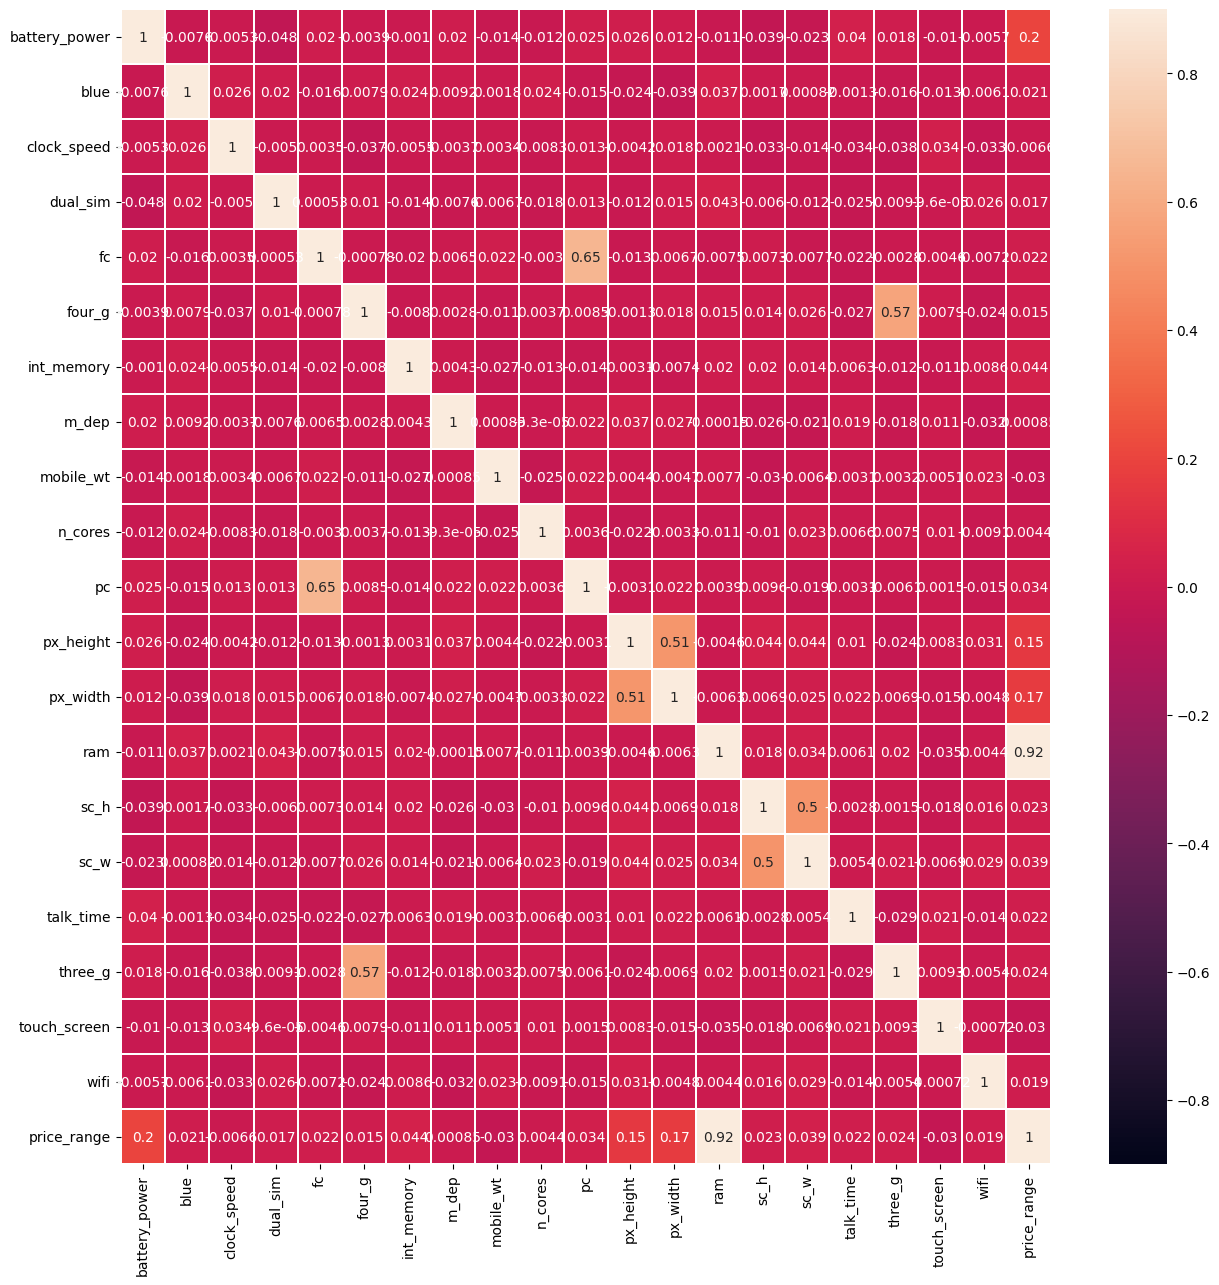

In [26]:
numeric_data = data.select_dtypes(include=[float, int])
cor = numeric_data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(cor, annot=True, vmin=-0.9, vmax=0.9, linewidths=0.2, linecolor='white')
plt.show()


In [27]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(data, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [29]:
def correlation(dataset, threshold):
    # Select only numeric columns
    numeric_data = dataset.select_dtypes(include=[float, int])

    # Compute the correlation matrix
    corr_matrix = numeric_data.corr().abs()

    # Select upper triangle of correlation matrix
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find index of feature columns with correlation greater than threshold
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

    return to_drop

# Assuming 'data' is your DataFrame
corr_features = correlation(data, 0.85)
print(len(set(corr_features)))

1


In [31]:
corr_features


['price_range']

In [32]:
data[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'ind']].nunique()

battery_power    1275
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1333
px_width         1313
ram              2070
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
ind                 2
dtype: int64

In [33]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range      float64
ind               object
dtype: object

**DETECTING OUTLIERS**

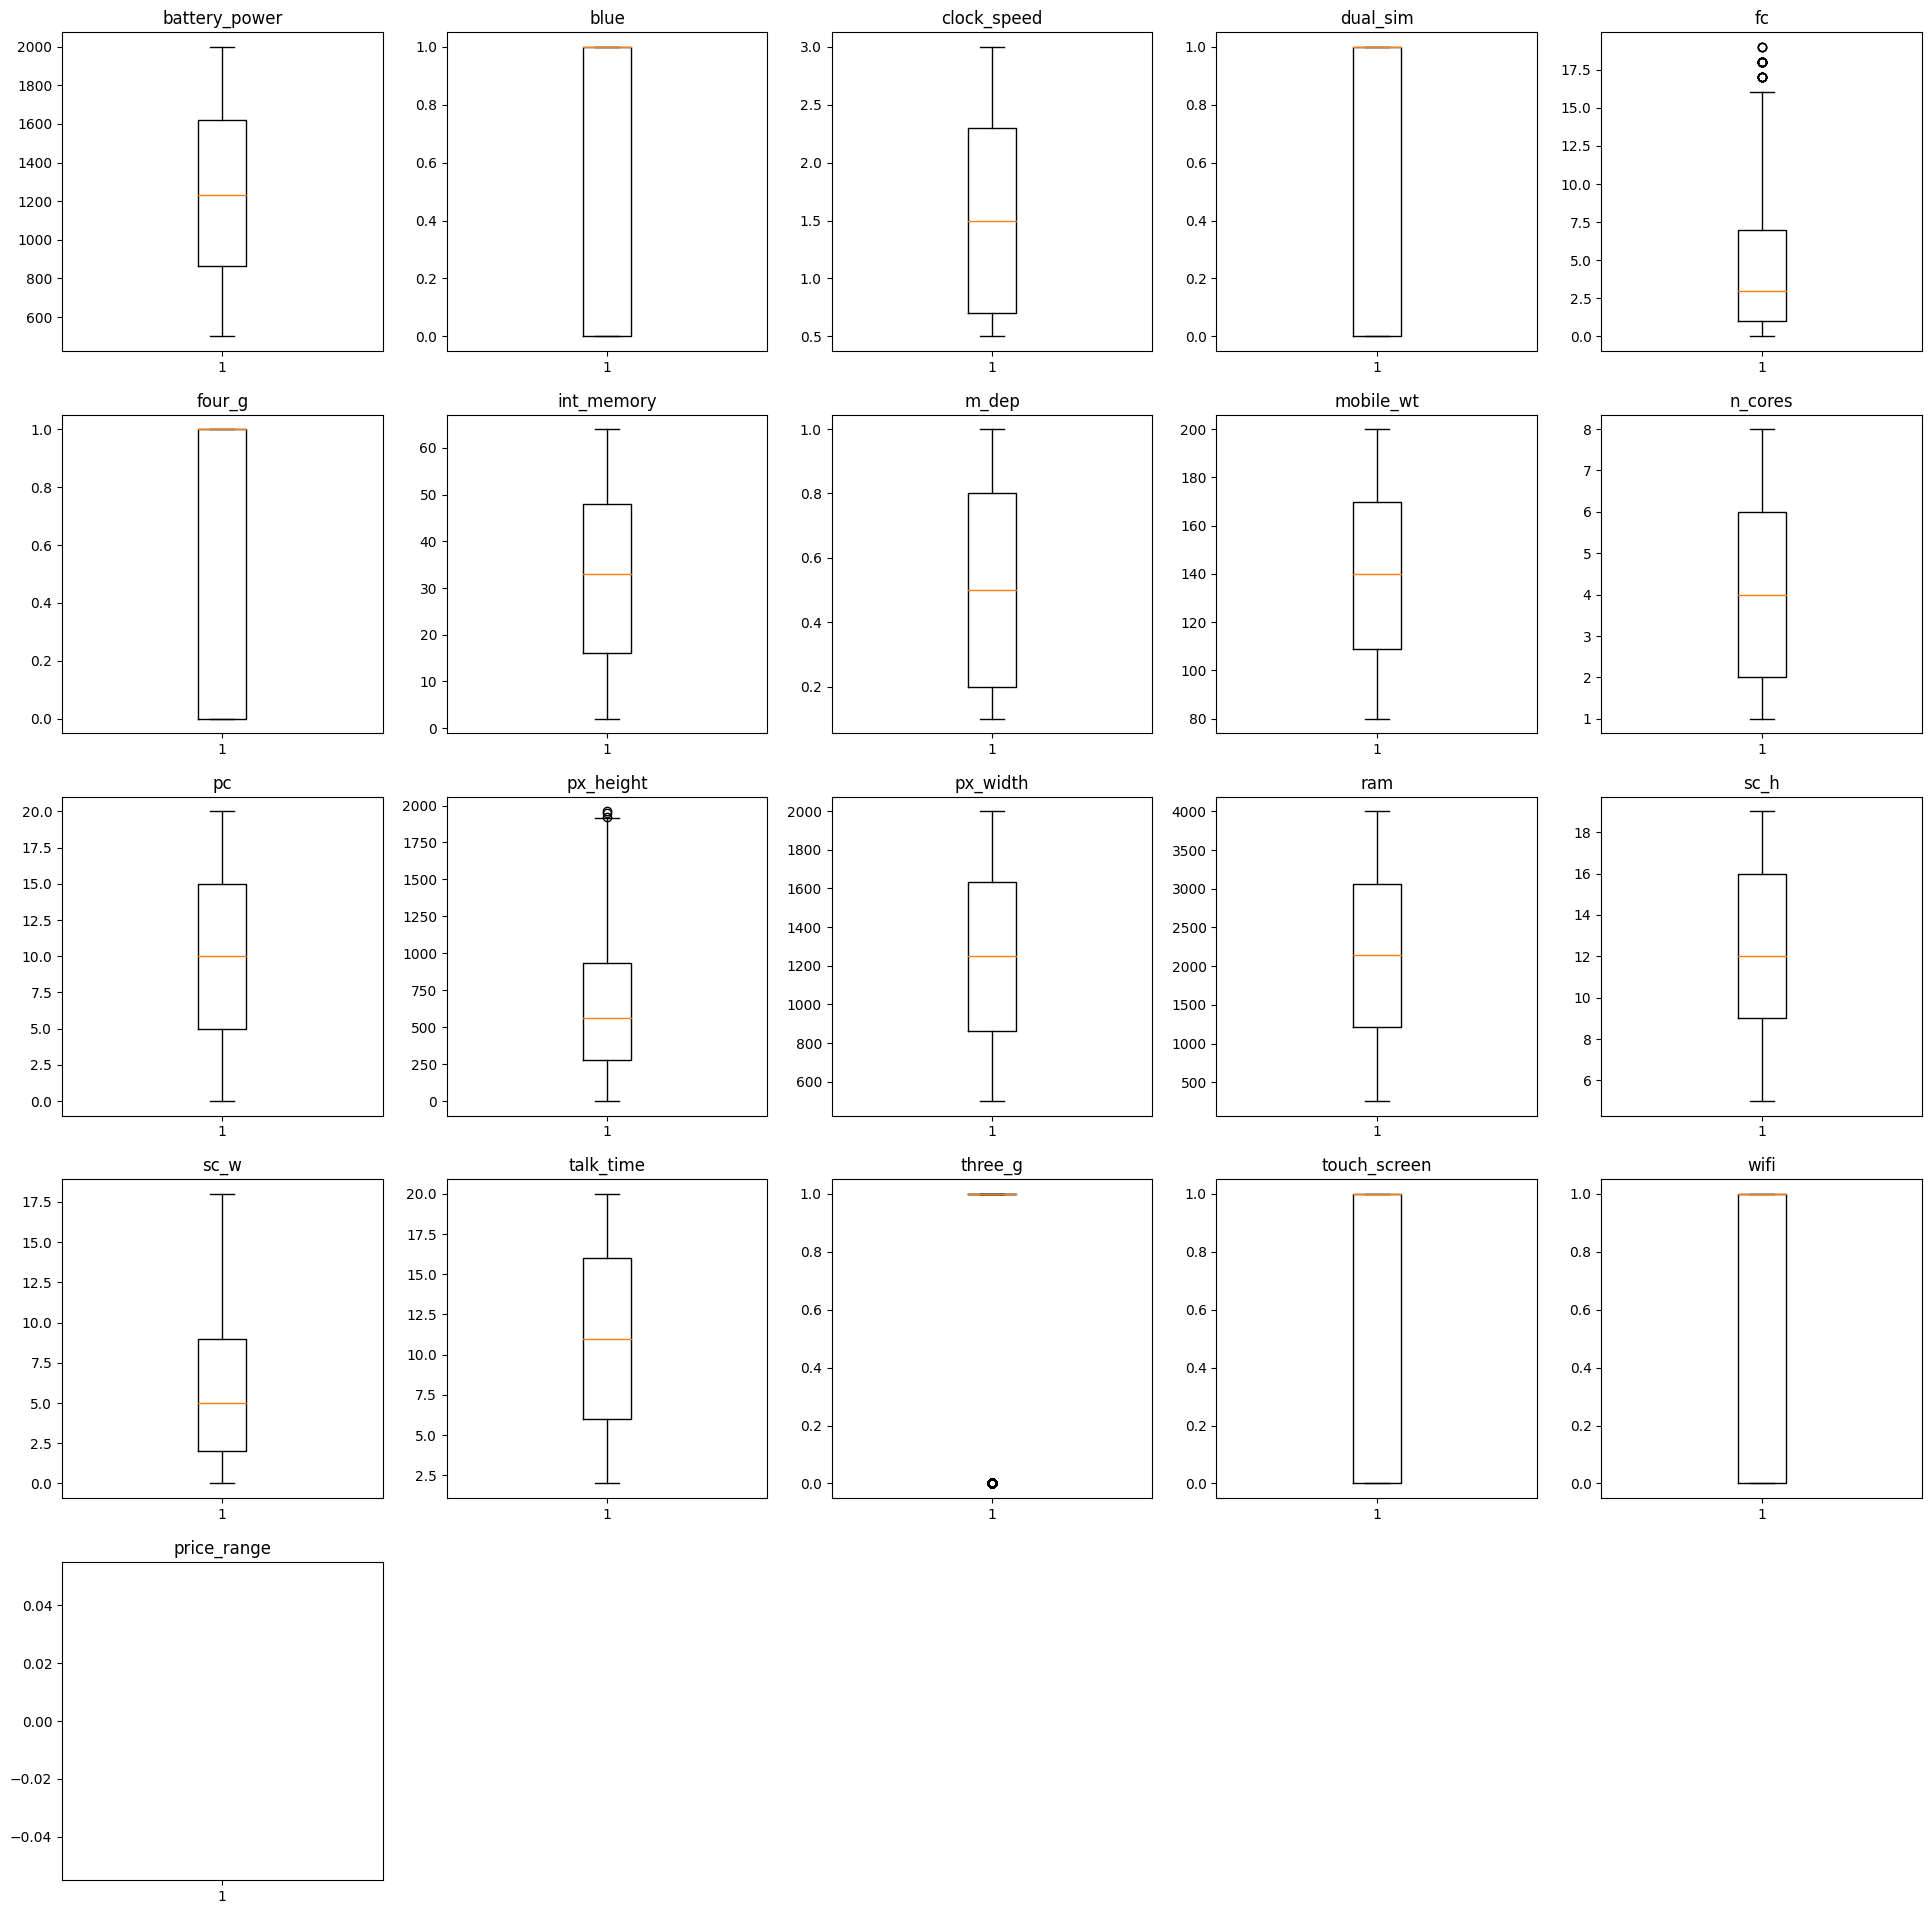

In [34]:

ax=data.select_dtypes(include=['int','float64'])

j = 1
plt.figure(figsize=(24,24))
for i in ax:
  plt.subplot(5,5,j)
  plt.title(i)
  plt.boxplot(data[i])
  j+=1

In [35]:
ax=['fc','px_height']
def outlier_det(col_name,data):
    Q1=np.percentile(data[col_name],25,interpolation='midpoint')
    Q2=np.percentile(data[col_name],50,interpolation='midpoint')
    Q3=np.percentile(data[col_name],75,interpolation='midpoint')
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    new_df = data[(data[col_name] < upper) & (data[col_name] > lower)]
    return new_df

In [36]:
print(f"dataset size before removing outliers= {data.shape[0]}")
for i in ax:
    data=outlier_det(i,data)
print(f"dataset size after removing outliers= {data.shape[0]}")

dataset size before removing outliers= 3000
dataset size after removing outliers= 2928


<ipython-input-36-81407124130b>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  data=outlier_det(i,data)


In [37]:
data=pd.DataFrame(data)

**SPLITTING DATASET INTO TWO DATASETS BASED ON H/W AND S/W REQUIREMENTS**

In [38]:
data_hw=data.loc[:,['battery_power','dual_sim','fc','int_memory','mobile_wt','n_cores','pc','ram','sc_h','sc_w','touch_screen']]

In [39]:
data_hw=pd.DataFrame(data_hw)

In [40]:
data_hw.head()

,battery_power,dual_sim,fc,int_memory,mobile_wt,n_cores,pc,ram,sc_h,sc_w,touch_screen
0,842,0,1,7,188,2,2,2549,9,7,0
1,1021,1,0,53,136,3,6,2631,17,3,1
2,563,1,2,41,145,5,6,2603,11,2,1
3,615,0,0,10,131,6,9,2769,16,8,0
4,1821,0,13,44,141,2,14,1411,8,2,1


In [41]:
data_sw=data.loc[:,['blue', 'clock_speed','four_g','m_dep','px_height','px_width','talk_time', 'three_g','wifi']]

In [42]:
data_sw.head()

,blue,clock_speed,four_g,m_dep,px_height,px_width,talk_time,three_g,wifi
0,0,2.2,0,0.6,20,756,19,0,1
1,1,0.5,1,0.7,905,1988,7,1,0
2,1,0.5,1,0.9,1263,1716,9,1,0
3,1,2.5,0,0.8,1216,1786,11,1,0
4,1,1.2,1,0.6,1208,1212,15,1,0


In [43]:
test,train=data[data['ind'].eq("test")],data[data['ind'].eq("train")]

In [44]:
test=test.drop(['ind','price_range'],axis=1)
train=train.drop('ind',axis=1)

In [45]:
test.shape

(974, 20)

In [46]:
train.shape

(1954, 21)

**EXPLORATORY DATA ANALYSIS**

In [47]:
data['price_range'].value_counts()

price_range
0.0    491
3.0    490
2.0    488
1.0    485
Name: count, dtype: int64

**Analyzing Target Variable(price_range)**

{1.0: 485, 2.0: 488, 3.0: 490, 0.0: 491}


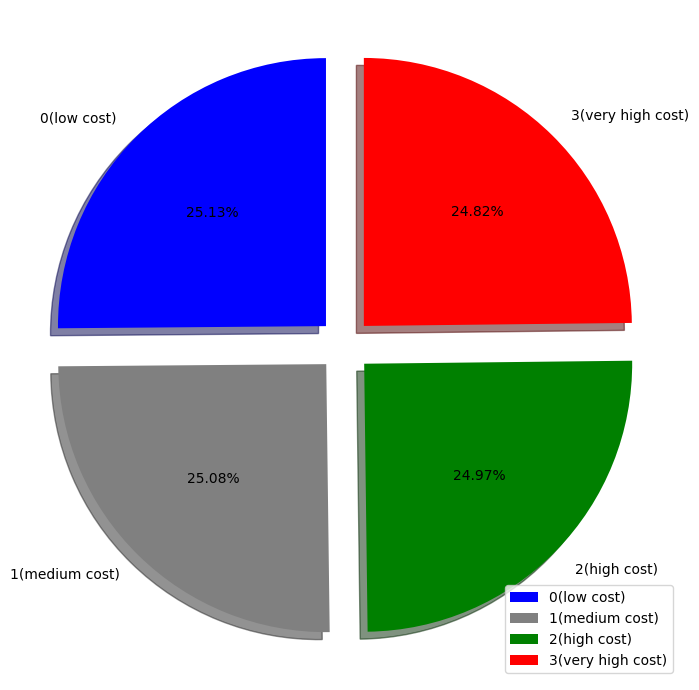

In [48]:
classification=train['price_range'].value_counts()
cls_label=['0(low cost)', '1(medium cost)', '2(high cost)','3(very high cost)']
class_label={}
leg_labels=['0(low cost)', '1(medium cost)', '2(high cost)','3(very high cost)']
label=train['price_range']
for i in label:
  if i not in class_label:
    class_label[i]=1
  else:
    class_label[i]+=1
print (class_label)
fig = plt.figure(figsize =(10, 7))
plt.pie(classification,labels=cls_label, startangle=90,colors=['blue','Gray','green','red'], shadow=True,explode=(0.1, 0.1,0.1,0.1), autopct='%1.2f%%')
plt.legend(leg_labels, loc ="lower right")
plt.tight_layout()
plt.savefig("Target_Pie.jpg")
plt.show()

From the above graph we can see that it is a balanced dataset.

**Analysing Bluetooth Feature**

{0: 1457, 1: 1471}


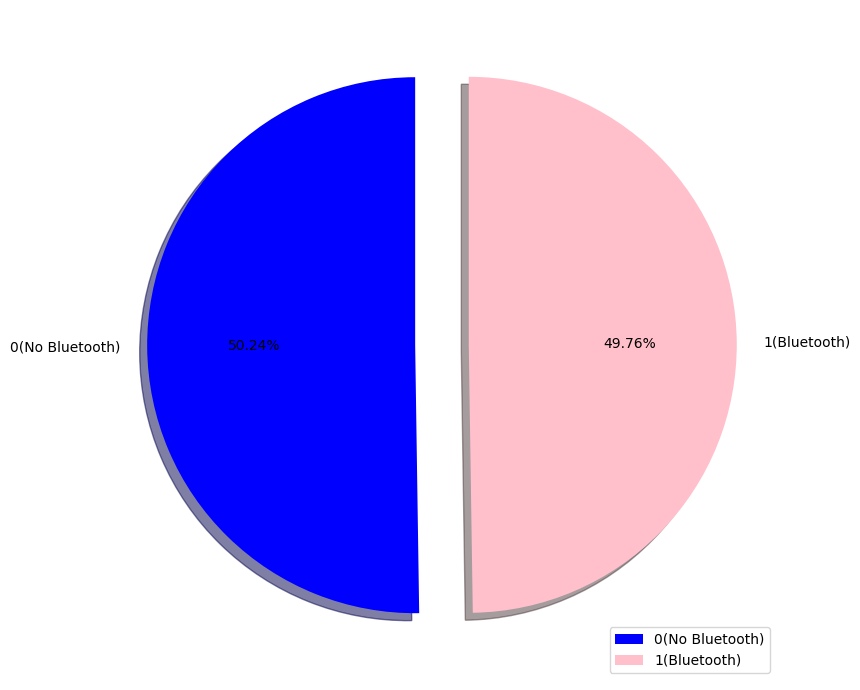

In [49]:
classification=data['blue'].value_counts()
cls_label=['0(No Bluetooth)', '1(Bluetooth)']
class_label={}
leg_labels=['0(No Bluetooth)', '1(Bluetooth)']
label=data['blue']
for i in label:
  if i not in class_label:
    class_label[i]=1
  else:
    class_label[i]+=1
print (class_label)
fig = plt.figure(figsize =(10, 7))
plt.pie(classification,labels=cls_label, startangle=90,colors=['blue','pink'], shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.legend(leg_labels, loc ="lower right")
plt.tight_layout()
plt.show()

From the graph we could see that half of the smartphone has bluetooth feature and other half does not have that feature.

**Analysing Dual Sim Feature**

{0: 1432, 1: 1496}


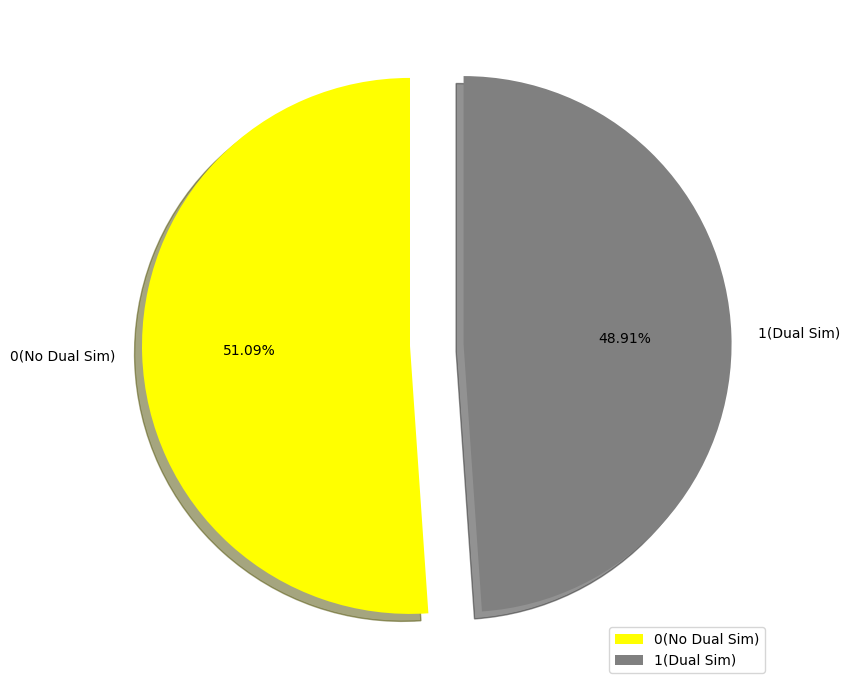

In [50]:
classification=data['dual_sim'].value_counts()
cls_label=['0(No Dual Sim)', '1(Dual Sim)']
class_label={}
leg_labels=['0(No Dual Sim)', '1(Dual Sim)']
label=data['dual_sim']
for i in label:
  if i not in class_label:
    class_label[i]=1
  else:
    class_label[i]+=1
print (class_label)
fig = plt.figure(figsize =(10, 7))
plt.pie(classification,labels=cls_label, startangle=90,colors=['yellow','grey'], shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.legend(leg_labels, loc ="lower right")
plt.tight_layout()
plt.show()

Most of the smartphones does not have dual sim feature.

**Analysing 4G Feature**

{0: 1441, 1: 1487}


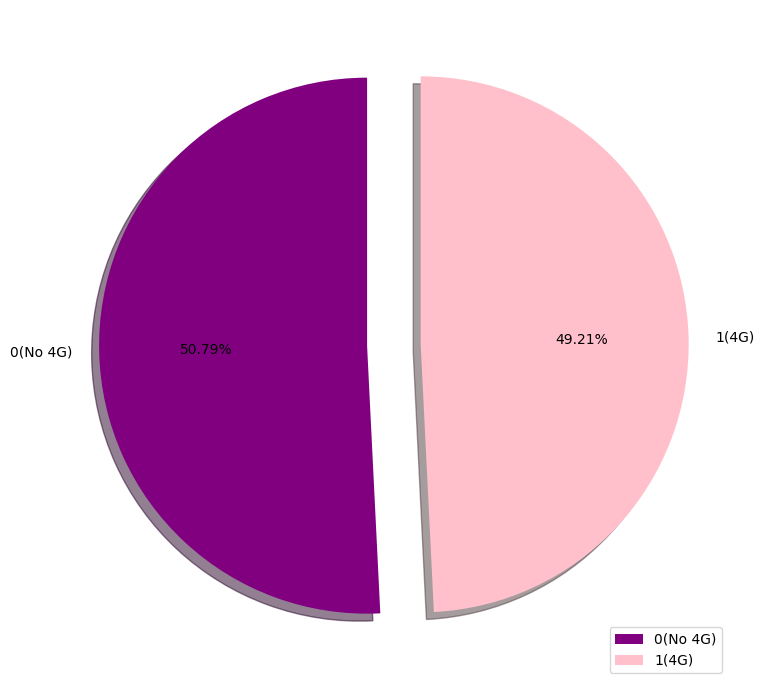

In [51]:
classification=data['four_g'].value_counts()
cls_label=['0(No 4G)', '1(4G)']
class_label={}
leg_labels=['0(No 4G)', '1(4G)']
label=data['four_g']
for i in label:
  if i not in class_label:
    class_label[i]=1
  else:
    class_label[i]+=1
print (class_label)
fig = plt.figure(figsize =(10, 7))
plt.pie(classification,labels=cls_label, startangle=90,colors=['purple','pink'], shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.legend(leg_labels, loc ="lower right")
plt.tight_layout()
plt.show()

Here the 4g feature is only available for 49.21% smartphones

**Analysing n_cores Feature**

{2: 374, 3: 365, 5: 366, 6: 321, 1: 370, 8: 368, 4: 406, 7: 358}


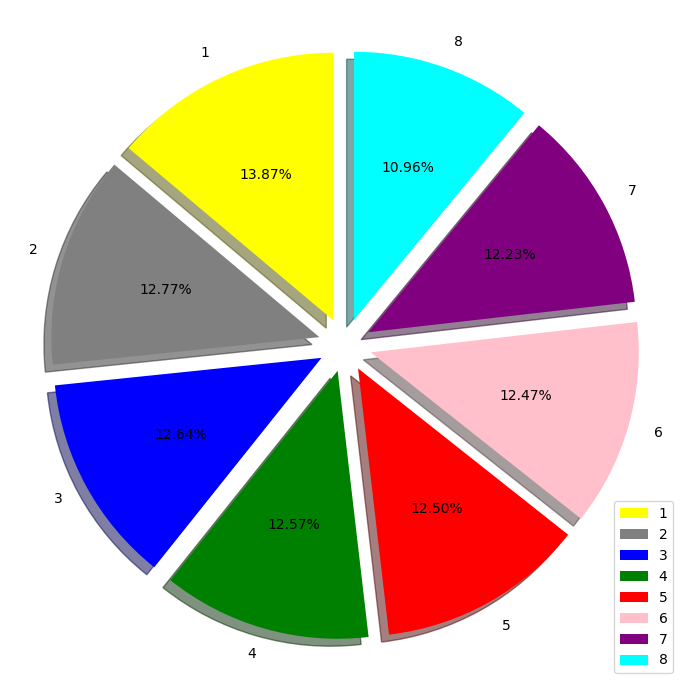

In [52]:
classification=data['n_cores'].value_counts()
cls_label=['1', '2','3','4','5','6','7','8']
class_label={}
leg_labels=['1', '2','3','4','5','6','7','8']
label=data['n_cores']
for i in label:
  if i not in class_label:
    class_label[i]=1
  else:
    class_label[i]+=1
print (class_label)
fig = plt.figure(figsize =(10, 7))
plt.pie(classification,labels=cls_label, startangle=90,colors=['yellow','grey','blue','green','red','pink','purple','cyan'], shadow=True,explode=(0.1, 0.1,0.1, 0.1,0.1, 0.1,0.1, 0.1), autopct='%1.2f%%')
plt.legend(leg_labels, loc ="lower right")
plt.tight_layout()
plt.show()

Single core smartphones are more popular compared to others.

**Analysing 3G Feature**

{0: 707, 1: 2221}


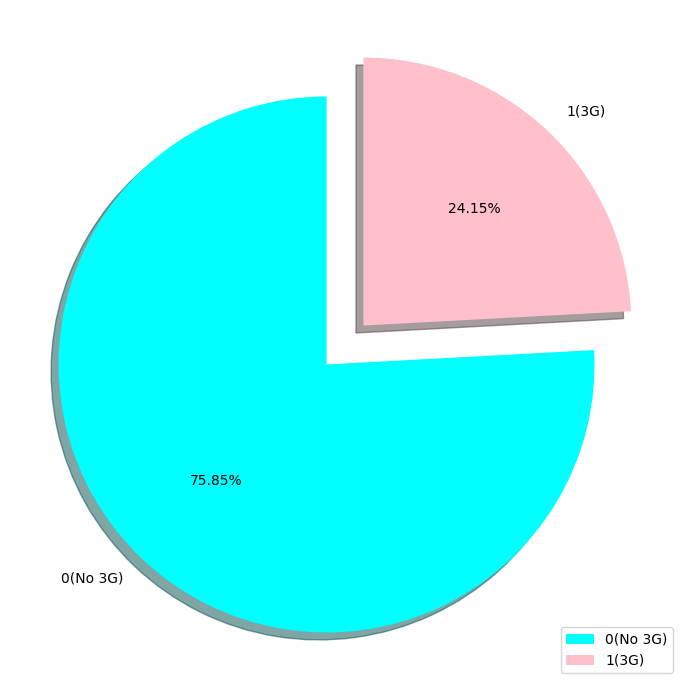

In [53]:
classification=data['three_g'].value_counts()
cls_label=['0(No 3G)', '1(3G)']
class_label={}
leg_labels=['0(No 3G)', '1(3G)']
label=data['three_g']
for i in label:
  if i not in class_label:
    class_label[i]=1
  else:
    class_label[i]+=1
print (class_label)
fig = plt.figure(figsize =(10, 7))
plt.pie(classification,labels=cls_label, startangle=90,colors=['cyan','pink'], shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.legend(leg_labels, loc ="lower right")
plt.tight_layout()
plt.show()

3G phones are less popular

**Analysing wifi Feature**

{1: 1480, 0: 1448}


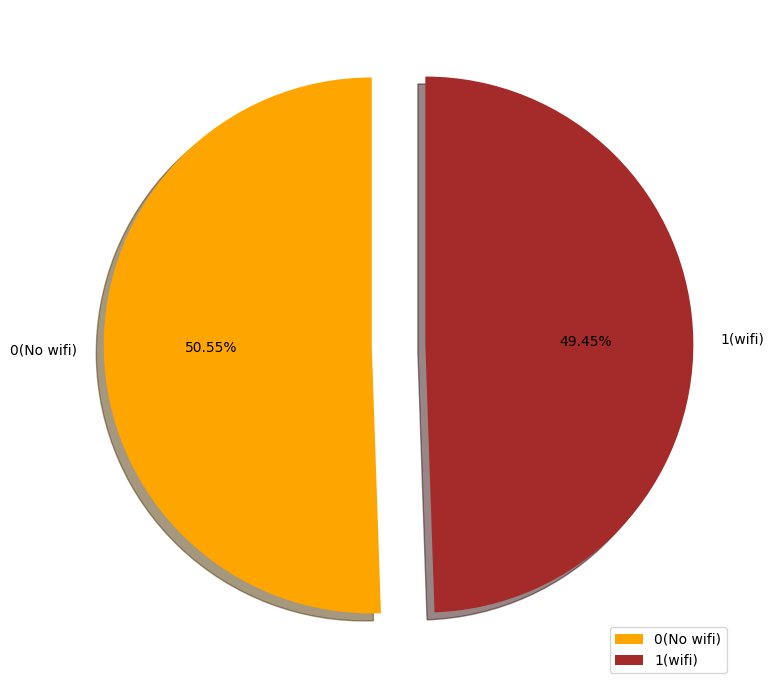

In [54]:
classification=data['wifi'].value_counts()
cls_label=['0(No wifi)', '1(wifi)']
class_label={}
leg_labels=['0(No wifi)', '1(wifi)']
label=data['wifi']
for i in label:
  if i not in class_label:
    class_label[i]=1
  else:
    class_label[i]+=1
print (class_label)
fig = plt.figure(figsize =(10, 7))
plt.pie(classification,labels=cls_label, startangle=90,colors=['orange','brown'], shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.legend(leg_labels, loc ="lower right")
plt.tight_layout()
plt.show()

49.45% phones are popular for its wifi feature.

**Density plot**

<ipython-input-55-674b6d51acd8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['battery_power'])
<ipython-input-55-674b6d51acd8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['clock_speed'])
<ipython-input-55-674b6d51acd8>:7: UserWarning: 

`distplot` is a deprecated function and 

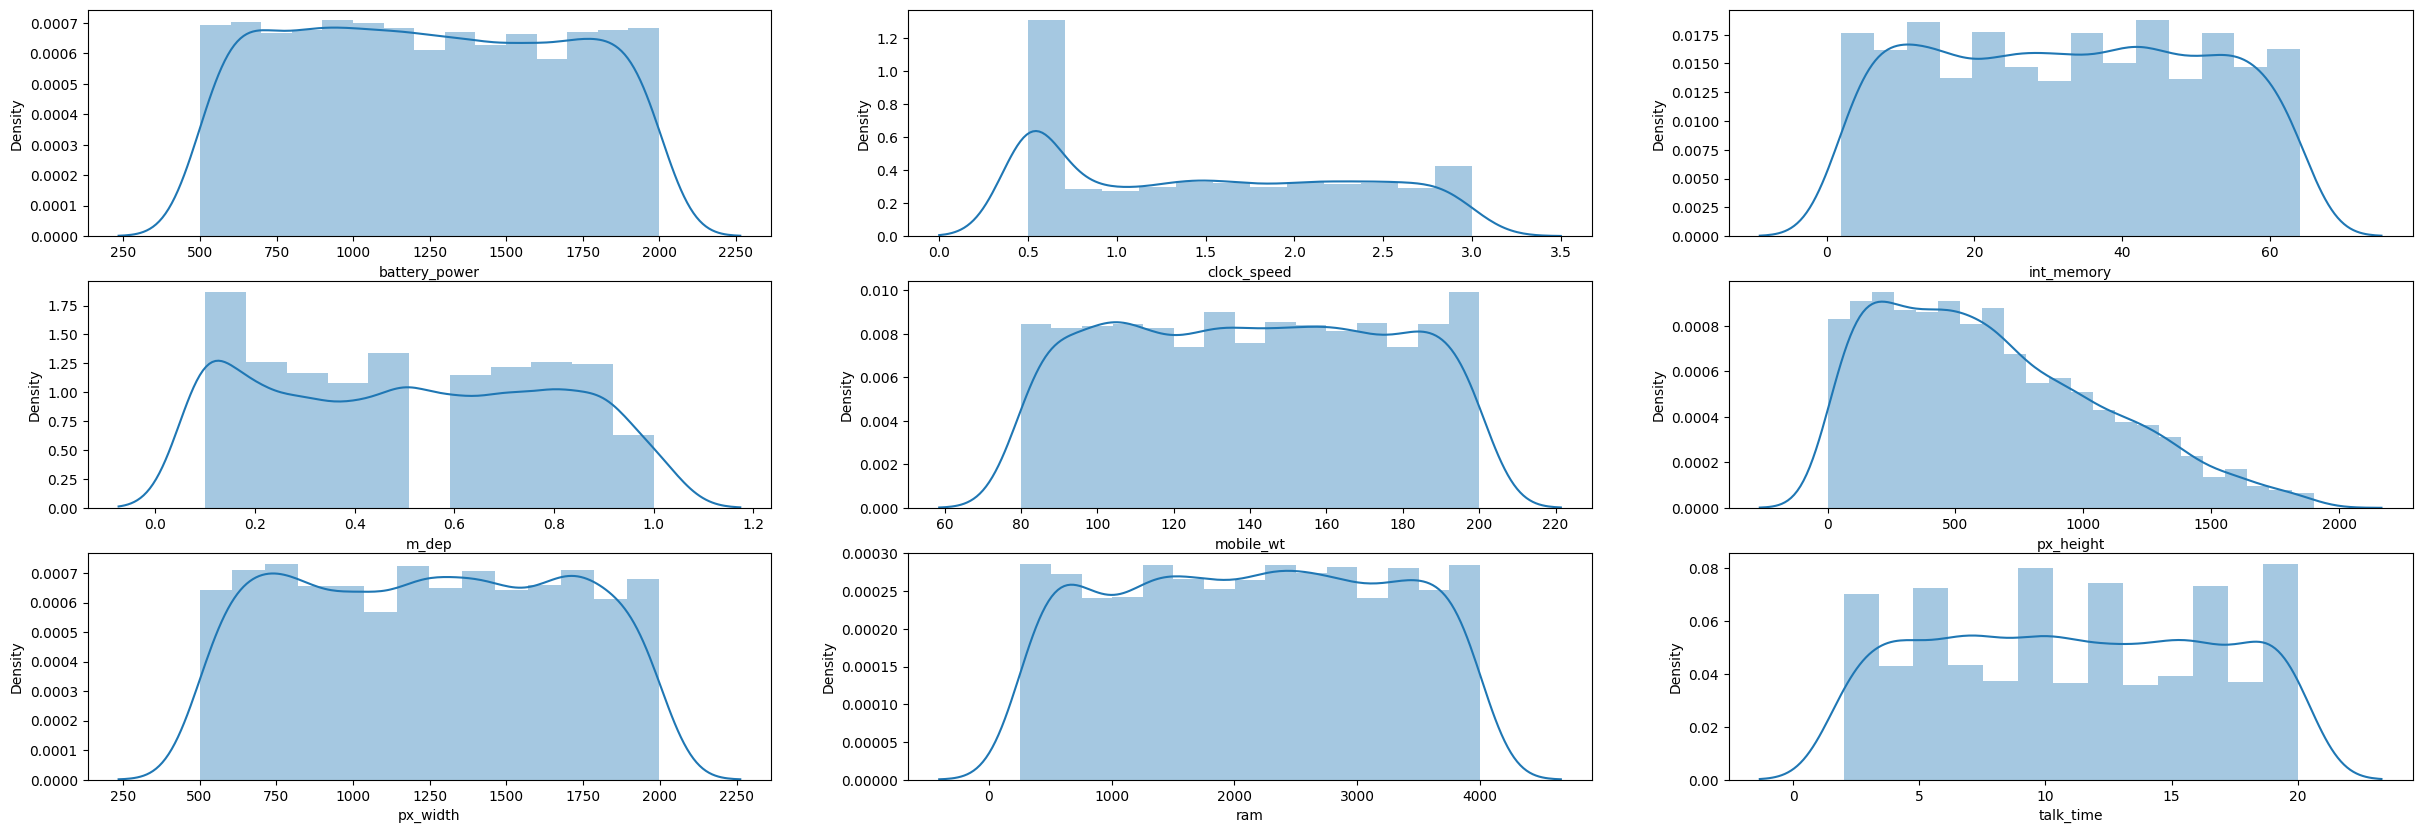

In [55]:
plt.figure(figsize=(30,10))
plt.subplot(331)
sns.distplot(data['battery_power'])
plt.subplot(332)
sns.distplot(data['clock_speed'])
plt.subplot(333)
sns.distplot(data['int_memory'])
plt.subplot(334)
sns.distplot(data['m_dep'])
plt.subplot(335)
sns.distplot(data['mobile_wt'])
plt.subplot(336)
sns.distplot(data['px_height'])
plt.subplot(337)
sns.distplot(data['px_width'])
plt.subplot(338)
sns.distplot(data['ram'])
plt.subplot(339)
sns.distplot(data['talk_time'])
plt.show()

Except px_height all the other features are normally distributed.


**Histogram comparing n_cores and price range**

In [56]:
px.histogram(data_frame=data_train, x='n_cores', color='price_range', title='Comparison of devices sold having different cores' )

Devices having n_cores 1 & 4 and of price_range 1 is sold the most.

**Histogram comparing battery power and price range**

In [57]:
px.histogram(data_frame=data_train, x='battery_power', color='price_range', title='Comparison of devices sold having different battery power' )

Devices having battery power in the range 600-649 and of price_range 2, sold the most.

**Splitting dataset into train and test set**

In [58]:
X=train.drop(['price_range','touch_screen','four_g','wifi','dual_sim'],axis=1)
y=train['price_range']

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [60]:
X_train.shape

(1563, 16)

In [61]:
X_test.shape

(391, 16)

In [62]:
y_train.shape

(1563,)

**BUILDING MODELS**

**Importing necessary libraries for Evaluation measures**

In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

**Logistic Regression**

In [64]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**Check the performance of the model**

In [65]:
print('Accuracy is :',accuracy_score(y_test,y_pred),'\n')
print('Precision is :',precision_score(y_test,y_pred,average='macro'),'\n')
print('recall is :',recall_score(y_test,y_pred,average='macro'), '\n')
print('F1 Score is :',f1_score(y_test,y_pred,average='macro'),'\n')

Accuracy is : 0.6035805626598465 

Precision is : 0.601541992048063 

recall is : 0.6146539301455536 

F1 Score is : 0.6031668674958567 



**Next we wil print the confusion matrix and check the values**

In [66]:
confusion_matrix(y_test,y_pred)

array([[65, 25,  2,  0],
       [24, 47, 25, 13],
       [ 0, 21, 47, 31],
       [ 0,  0, 14, 77]])

**KNN**

In [67]:
from sklearn.neighbors import KNeighborsClassifier

acc_values=[]

neighbors=np.arange(3,15)

for k in neighbors:

  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')

  classifier.fit(X_train,y_train)

  y_pred=classifier.predict(X_test)

  acc=accuracy_score(y_test,y_pred)

  acc_values.append(acc)


print different accuracy values that we got

In [68]:
acc_values

[0.907928388746803,
 0.9207161125319693,
 0.9156010230179028,
 0.9104859335038363,
 0.9028132992327366,
 0.9181585677749361,
 0.9104859335038363,
 0.9232736572890026,
 0.9130434782608695,
 0.9156010230179028,
 0.9053708439897699,
 0.9181585677749361]

From the above we can see that the highest level of accuracy is 0.955. Now check for which k value we got the highest accuracy value

Text(0, 0.5, 'Accuracy')

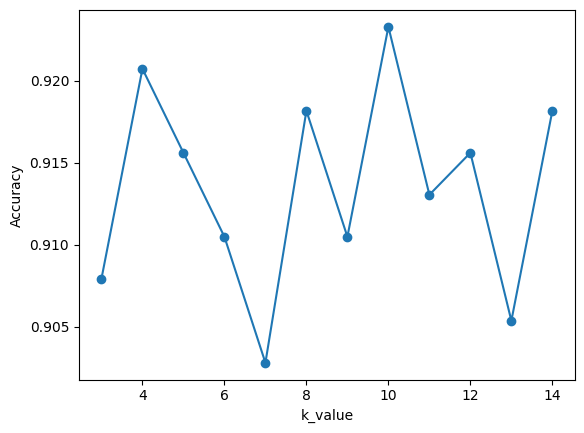

In [69]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k_value')
plt.ylabel('Accuracy')

from the above graph we can see that the highest accuracy value is for k=7


**Now we can create model with k=7**

In [70]:
 #code to create knn model
  #taking instance of knn to a variable
classifier=KNeighborsClassifier(n_neighbors=7,metric='minkowski')
  #in above code inside the brackets the parametres ,they are number of neighbors and measurement of distance
  #now create the model
classifier.fit(X_train,y_train)
  #predict the output using this model
y_pred=classifier.predict(X_test)

In [71]:
print('Accuracy is :',accuracy_score(y_test,y_pred),'\n')
print('Precision is :',precision_score(y_test,y_pred,average='macro'),'\n')
print('recall is :',recall_score(y_test,y_pred,average='macro'), '\n')
print('F1 Score is :',f1_score(y_test,y_pred,average='macro'),'\n')

Accuracy is : 0.9028132992327366 

Precision is : 0.9021863754546526 

recall is : 0.9051138939950267 

F1 Score is : 0.9031387707394372 



**Check the Confusion Matrix**

In [72]:
confusion_matrix(y_test,y_pred)

array([[90,  2,  0,  0],
       [ 8, 96,  5,  0],
       [ 0,  6, 83, 10],
       [ 0,  0,  7, 84]])

**Support Vector Machine**

**Linear**

In [73]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_pred=svm_linear.predict(X_test)

print('Accuracy is :',accuracy_score(y_test,y_pred),'\n')
print('Precision is :',precision_score(y_test,y_pred,average='macro'),'\n')
print('recall is :',recall_score(y_test,y_pred,average='macro'), '\n')
print('F1 Score is :',f1_score(y_test,y_pred,average='macro'),'\n')

Accuracy is : 0.979539641943734 

Precision is : 0.9796984968871572 

recall is : 0.9809958882804914 

F1 Score is : 0.9801449578134154 



**Check the Confusion Matrix**

In [74]:
confusion_matrix(y_test,y_pred)

array([[ 91,   1,   0,   0],
       [  2, 103,   4,   0],
       [  0,   0,  98,   1],
       [  0,   0,   0,  91]])

**Ploynomial**

In [75]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(X_train,y_train)
y_pred=svm_poly.predict(X_test)
print('Accuracy is :',accuracy_score(y_test,y_pred),'\n')
print('Precision is :',precision_score(y_test,y_pred,average='macro'),'\n')
print('recall is :',recall_score(y_test,y_pred,average='macro'), '\n')
print('F1 Score is :',f1_score(y_test,y_pred,average='macro'),'\n')

Accuracy is : 0.948849104859335 

Precision is : 0.9488577990640885 

recall is : 0.9509438811642641 

F1 Score is : 0.9495667599741147 



**Check the Confusion Matrix**

In [76]:
confusion_matrix(y_test,y_pred)

array([[ 91,   1,   0,   0],
       [  6, 100,   3,   0],
       [  0,   4,  91,   4],
       [  0,   0,   2,  89]])

**Radial**

In [77]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(X_train,y_train)
y_pred=svm_radial.predict(X_test)
print('Accuracy is :',accuracy_score(y_test,y_pred),'\n')
print('Precision is :',precision_score(y_test,y_pred,average='macro'),'\n')
print('recall is :',recall_score(y_test,y_pred,average='macro'), '\n')
print('F1 Score is :',f1_score(y_test,y_pred,average='macro'),'\n')

Accuracy is : 0.9462915601023018 

Precision is : 0.9478550503800999 

recall is : 0.9474822561430061 

F1 Score is : 0.9460493492901362 



**Check the Confusion Matrix**

In [78]:
confusion_matrix(y_test,y_pred)

array([[ 91,   1,   0,   0],
       [  3, 105,   1,   0],
       [  0,   6,  84,   9],
       [  0,   0,   1,  90]])

**Ada Boost**

In [79]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
adb.fit(X_train,y_train)
y_pred = adb.predict(X_test)
print('Accuracy is :',accuracy_score(y_test,y_pred),'\n')
print('Precision is :',precision_score(y_test,y_pred,average='macro'),'\n')
print('recall is :',recall_score(y_test,y_pred,average='macro'), '\n')
print('F1 Score is :',f1_score(y_test,y_pred,average='macro'),'\n')

Accuracy is : 0.659846547314578 

Precision is : 0.7638836631363806 

recall is : 0.6423073585768042 

F1 Score is : 0.6310605017336056 



**Check the Confusion Matrix**

In [80]:
confusion_matrix(y_test,y_pred)

array([[ 29,  63,   0,   0],
       [  3, 105,   1,   0],
       [  0,  16,  81,   2],
       [  0,   0,  48,  43]])

**Extreme Gradient Boosting**

In [81]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)

print('Accuracy is :',accuracy_score(y_test,y_pred),'\n')
print('Precision is :',precision_score(y_test,y_pred,average='macro'),'\n')
print('recall is :',recall_score(y_test,y_pred,average='macro'), '\n')
print('F1 Score is :',f1_score(y_test,y_pred,average='macro'),'\n')
print(confusion_matrix(y_test,y_pred))

Accuracy is : 0.9104859335038363 

Precision is : 0.9124765360571608 

recall is : 0.9125669099990998 

F1 Score is : 0.9121392138668025 

[[87  5  0  0]
 [ 4 95 10  0]
 [ 0  3 89  7]
 [ 0  0  6 85]]


**Gradient Boosting**

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier( )
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
print('Accuracy is :',accuracy_score(y_test,y_pred),'\n')
print('Precision is :',precision_score(y_test,y_pred,average='macro'),'\n')
print('recall is :',recall_score(y_test,y_pred,average='macro'), '\n')
print('F1 Score is :',f1_score(y_test,y_pred,average='macro'),'\n')
print(confusion_matrix(y_test,y_pred))

Accuracy is : 0.9207161125319693 

Precision is : 0.9211408007873593 

recall is : 0.923234662115795 

F1 Score is : 0.9218255150626273 

[[90  2  0  0]
 [ 5 96  8  0]
 [ 0  4 88  7]
 [ 0  0  5 86]]


**NAIVE BAYES CLASSIFIERS**

**Gaussian Naive Bayes**

In [83]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)


GaussianNB()

In [84]:
y_pred=model.predict(X_test)
print('Accuracy is :',accuracy_score(y_test,y_pred),'\n')
print('Precision is :',precision_score(y_test,y_pred,average='macro'),'\n')
print('recall is :',recall_score(y_test,y_pred,average='macro'), '\n')
print('F1 Score is :',f1_score(y_test,y_pred,average='macro'),'\n')

Accuracy is : 0.7953964194373402 

Precision is : 0.7964551767676767 

recall is : 0.8018978069087762 

F1 Score is : 0.7985818763353182 



**Confusion Matrix**

In [85]:
print(confusion_matrix(y_test,y_pred))

[[83  9  0  0]
 [13 76 20  0]
 [ 0 15 70 14]
 [ 0  0  9 82]]


**Bernoulli Naive Bayes**

In [86]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(X_train,y_train)
classifier

BernoulliNB()

In [87]:
y_pred=classifier.predict(X_test)
print('Accuracy is :',accuracy_score(y_test,y_pred),'\n')
print('Precision is :',precision_score(y_test,y_pred,average='macro'),'\n')
print('recall is :',recall_score(y_test,y_pred,average='macro'), '\n')
print('F1 Score is :',f1_score(y_test,y_pred,average='macro'),'\n')

Accuracy is : 0.22762148337595908 

Precision is : 0.22703442693676257 

recall is : 0.23925123374166055 

F1 Score is : 0.19212189573579855 



**Confusion Matrix**

In [88]:
print(confusion_matrix(y_test,y_pred))

[[25  7  6 54]
 [35  7  7 60]
 [23  8  6 62]
 [23  8  9 51]]


**Decision Tree**

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)

In [90]:
print('Accuracy is :',accuracy_score(y_test,y_pred),'\n')
print('Precision is :',precision_score(y_test,y_pred,average='macro'),'\n')
print('recall is :',recall_score(y_test,y_pred,average='macro'), '\n')
print('F1 Score is :',f1_score(y_test,y_pred,average='macro'),'\n')

Accuracy is : 0.8388746803069054 

Precision is : 0.8395171739094691 

recall is : 0.8440731917995581 

F1 Score is : 0.8411706196086501 



**Check the Confusion Matrix**

In [91]:
confusion_matrix(y_test,y_pred)

array([[84,  8,  0,  0],
       [13, 82, 14,  0],
       [ 0, 10, 78, 11],
       [ 0,  0,  7, 84]])

**Random Forest Algorithm**

In [92]:
from sklearn.ensemble import RandomForestClassifier
class_weight = dict({0:818, 1:326})
rf=RandomForestClassifier(class_weight=class_weight)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print('Accuracy is :',accuracy_score(y_test,y_pred),'\n')
print('Precision is :',precision_score(y_test,y_pred,average='macro'),'\n')
print('recall is :',recall_score(y_test,y_pred,average='macro'), '\n')
print('F1 Score is :',f1_score(y_test,y_pred,average='macro'),'\n')
confusion_matrix(y_test,y_pred)

Accuracy is : 0.8695652173913043 

Precision is : 0.8722697833693145 

recall is : 0.8736416627072789 

F1 Score is : 0.872412164262993 



array([[85,  7,  0,  0],
       [10, 86, 13,  0],
       [ 0,  8, 85,  6],
       [ 0,  0,  7, 84]])

Selected SVM Linear as the best model.

**Ranking according to Price Range**

In [93]:
train["rank_by_price"] = train["price_range"].rank()
dt1 = train
dt1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,734.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,1220.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,1220.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,1220.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,734.0


In [94]:
dt1["rank_by_price"] = dt1["rank_by_price"].sort_values()
dt1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,734.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,1220.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,1220.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,1220.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,734.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0.0,246.0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2.0,1220.5
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3.0,1709.5
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0.0,246.0


**Sorting Ranked Dataset**

In [95]:
dt1.sort_values(by=["rank_by_price"])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1001,1524,0,2.6,1,5,0,57,0.5,124,2,...,635,947,11,4,16,0,1,1,0.0,246.0
1292,1365,0,0.6,0,0,1,31,0.3,125,4,...,970,1300,14,7,13,1,0,1,0.0,246.0
1290,912,1,2.8,1,6,1,46,0.4,84,4,...,1310,851,8,4,4,1,1,1,0.0,246.0
490,685,0,2.7,0,7,0,17,0.3,174,6,...,870,1223,8,0,18,1,0,1,0.0,246.0
1286,584,1,1.8,0,0,1,19,0.3,168,3,...,1622,465,12,8,4,1,1,0,0.0,246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,853,1,2.0,0,10,1,3,0.6,200,2,...,740,3701,15,8,8,1,1,0,3.0,1709.5
436,685,0,0.5,1,8,1,13,0.8,82,7,...,1203,3210,15,7,2,1,1,1,3.0,1709.5
432,1421,0,2.8,0,0,1,57,0.4,165,1,...,1657,2775,13,8,14,1,0,1,3.0,1709.5
1339,1988,1,0.5,0,0,1,16,0.1,94,8,...,696,3144,16,2,14,1,0,0,3.0,1709.5


**Ranking on all the features using rank()**

In [96]:
dt2 = train
RankedDataset1 = dt2.rank()
RankedDataset1.sort_values(by="price_range")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1001,1344.0,493.5,1704.5,1457.0,1278.5,470.0,1747.5,977.5,718.0,357.0,...,157.0,365.0,767.5,812.0,1497.0,235.5,1463.0,1464.0,246.0,246.0
1292,1146.0,493.5,440.0,480.0,237.0,1447.0,960.0,617.0,735.0,852.5,...,605.0,536.0,1185.5,1248.5,1179.0,1212.5,486.0,1464.0,246.0,246.0
1290,572.5,1470.5,1825.0,1457.0,1403.5,1447.0,1416.5,794.5,75.5,852.5,...,1066.0,320.0,409.0,812.0,250.0,1212.5,1463.0,1464.0,246.0,246.0
490,265.0,493.5,1758.0,480.0,1509.0,470.0,526.5,617.0,1520.5,1339.0,...,480.5,496.5,409.0,89.0,1696.0,1212.5,486.0,1464.0,246.0,246.0
1286,119.5,1470.5,1181.5,480.0,237.0,1447.0,585.0,617.0,1425.0,598.0,...,1461.0,115.0,908.5,1374.5,250.0,1212.5,1463.0,487.0,246.0,246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,493.0,1470.5,1308.0,480.0,1744.5,1447.0,52.0,1168.5,1945.0,357.0,...,307.5,1788.5,1322.5,1374.5,678.5,1212.5,1463.0,487.0,1709.5,1709.5
436,265.0,493.5,202.0,1457.0,1597.0,1447.0,383.0,1555.5,41.0,1577.0,...,908.5,1537.0,1322.5,1248.5,48.0,1212.5,1463.0,1464.0,1709.5,1709.5
432,1209.0,493.5,1825.0,480.0,237.0,1447.0,1747.5,794.5,1383.5,118.5,...,1510.0,1331.0,1051.0,1374.5,1278.5,1212.5,486.0,1464.0,1709.5,1709.5
1339,1936.0,1470.5,202.0,480.0,237.0,1447.0,491.5,155.5,240.0,1829.0,...,245.0,1507.0,1458.5,455.0,1278.5,1212.5,486.0,487.0,1709.5,1709.5


Ranking all the features separately to correct output

In [97]:
r = train.copy()
r["rank_by_battery"] = r["battery_power"].rank(ascending=False,axis=0,method="dense")
r["rank_by_blueooth"] = r["blue"].rank(ascending=False,axis=0,method="dense")
r["rank_by_clockspeed"] = r["clock_speed"].rank(ascending=False,axis=0,method="dense")
r["rank_by_DualSIM"] = r["dual_sim"].rank(ascending=False,axis=0,method="dense")
r["rank_by_fc"] = r["fc"].rank(ascending=False,axis=0,method="dense")
r["rank_by_4G"] = r["four_g"].rank(ascending=False,axis=0,method="dense")
r["rank_by_InternalMemory"] = r["int_memory"].rank(ascending=False,axis=0,method="dense")
r["rank_by_mdep"] = r["m_dep"].rank(ascending=False,axis=0,method="dense")
r["rank_by_weight"] = r["mobile_wt"].rank(ascending=False,axis=0,method="dense")
r["rank_by_ncores"] = r["n_cores"].rank(ascending=False,axis=0,method="dense")
r["rank_by_pc"] = r["pc"].rank(ascending=False,axis=0,method="dense")
r["rank_by_height"] = r["px_height"].rank(ascending=False,axis=0,method="dense")
r["rank_by_width"] = r["px_width"].rank(ascending=False,axis=0,method="dense")
r["rank_by_ram"] = r["ram"].rank(ascending=False,axis=0,method="dense")
r["rank_by_sch"] = r["sc_h"].rank(ascending=False,axis=0,method="dense")
r["rank_by_scw"] = r["sc_w"].rank(ascending=False,axis=0,method="dense")
r["rank_by_talktime"] = r["talk_time"].rank(ascending=False,axis=0,method="dense")
r["rank_by_3G"] = r["three_g"].rank(ascending=False,axis=0,method="dense")
r["rank_by_touchscreen"] = r["touch_screen"].rank(ascending=False,axis=0,method="dense")
r["rank_by_wifi"] = r["wifi"].rank(ascending=False,axis=0,method="dense")
r["rank_by_price"] = r["price_range"].rank(ascending=False,axis=0,method="dense")
r.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,...,19.0,1103.0,915.0,589.0,11.0,12.0,2.0,2.0,2.0,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,15.0,388.0,10.0,554.0,3.0,16.0,14.0,1.0,1.0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,15.0,166.0,205.0,568.0,9.0,17.0,12.0,1.0,1.0,2.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,12.0,193.0,152.0,499.0,4.0,11.0,10.0,1.0,2.0,2.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,7.0,199.0,586.0,1047.0,12.0,17.0,6.0,1.0,1.0,2.0


In [98]:
price=r[["price_range","rank_by_price"]]
price.drop_duplicates("price_range")

,price_range,rank_by_price
0,1.0,3.0
1,2.0,2.0
6,3.0,1.0
7,0.0,4.0


In [99]:
estimators = [
    ('logistic_regression', logit_model),
    ('random_forest', rf),
    ('svm', svm_linear)
]

stack = StackingClassifier(estimators=estimators,
                           stack_method='predict', n_jobs=-1)
stack.fit(X_train, y_train)

stack_pred_train = stack.predict(X_train)
stack_pred_test = stack.predict(X_test)

stack_score_train = accuracy_score(y_train, stack_pred_train)
stack_score_test = accuracy_score(y_test, stack_pred_test)

print("Train accuracy:", stack_score_train)
print("Test accuracy:", stack_score_test)

Train accuracy: 0.9884836852207294
Test accuracy: 0.979539641943734


In [100]:
mobile_df = pd.concat([X_train, y_test], axis=0, ignore_index=True)
mobile_df.shape

(1954, 17)

In [101]:
mobile_df.insert(0, 'id', range(1, len(mobile_df) + 1))
mobile_df.head()

,id,battery_power,blue,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,0
0,1,1454.0,1.0,1.6,6.0,21.0,0.2,160.0,4.0,10.0,186.0,1100.0,719.0,14.0,10.0,10.0,1.0,NaN
1,2,1603.0,1.0,0.5,1.0,17.0,0.5,114.0,2.0,8.0,430.0,1207.0,1637.0,17.0,3.0,11.0,1.0,NaN
2,3,659.0,0.0,0.5,7.0,5.0,0.3,169.0,8.0,10.0,659.0,730.0,2190.0,16.0,10.0,16.0,1.0,NaN
3,4,719.0,0.0,2.9,7.0,6.0,0.7,102.0,6.0,8.0,405.0,1141.0,841.0,9.0,1.0,2.0,1.0,NaN
4,5,1201.0,1.0,0.5,2.0,10.0,1.0,99.0,7.0,7.0,306.0,558.0,495.0,15.0,6.0,14.0,1.0,NaN


In [102]:
mobile_df.to_csv('mobile.csv', index=False)

